---

```
CISC 3440: Machine Learning
P3 (35 +5 Points)
Due: Dec 13th, 11:59 pm
```
---
**Submission Instructions**


* You are expected to complete this project on your own (not with a partner).
* Please refer to the syllabus for the late submission policy.
* You must submit your assignment via Blackboard.
* Your code should work without errors; code that fails will not be graded.
* **Note: Submissions later than Dec 15th will not be accepted**


The project will involve two parts:
1. In the first part you will implement a Multi-layer perceptron to model the AND gate.
2. In the second part you will use Pytorch Library to work with Auto-Encoders.

## Part I: AND Gate.

**Training Data** We will start by generating some training data. The data corresponds to four possible values for a two input AND gate. Below is the logic table corresponding to the AND gate.

| Input \(x_1\) | Input \(x_2\) | Output \(y\) |
|---------------|---------------|--------------|
| 0             | 0             | 0            |
| 0             | 1             | 0            |
| 1             | 0             | 0            |
| 1             | 1             | 1            |


We will first create 1000 samples for each possible combination of input and output values. The code below generates the training dataset and stores it in the variable name *dataset*. Most of the computations in this project will depend on the Numpy library. If you are unfamiliar with Numpy, please refer to the Numpy tutorial on Blackboard.


In [70]:
import numpy as np

dataset=np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]]*1000)
print(dataset.shape)

(4000, 3)


**Weights and Initializations:**

The code below initializes the weights and bias values for the hidden and output layers. We initialize the hidden values to small random values and set the bias to zero.


In [71]:
weights_hidden =np.random.normal(0,0.1,2)
weights_out=np.random.normal(0,0.1,1)[0]
bias_hidden=0.0
bias_out=0.0
print("Weights hidden:{},weights_out:{},bias_hidden:{},bias out:{}".format(weights_hidden,weights_out,bias_hidden,bias_out))

Weights hidden:[-0.06382237  0.16388054],weights_out:-0.017501575666258887,bias_hidden:0.0,bias out:0.0


**[4 points] Task-1**

The initializations above should give you insight into how the network is structured. To be precise on the network structure you will answer the following question:

1. (2 points) Based on the network initialization we have, answer the following:
  - How many neurons are there in the hidden layer?
  - How many neurons are there in the output layer?
  - What is the dimension of the bias for the hidden layer and the output layer?
  - Draw the network diagram for the given network configuration, your diagram should depict the input, hidden and output layers.

2. (1 point) Write the equation that computes the output values for the hidden layers, given the input [$x_1$,$x_2$], weights [$w_{h1}$,$w_{h2}$], and bias
 $b_h$. The equation is for a single sample.

1. (1 point) Let $o_h$ be the output of the hidden unit in the hidden layer. If the weights and the bias of the output layer are $w_o$ and $b_o$. Write the equation to compute the output of the neuron in the output layer. The equation is for a single sample.


**[3 points] Task-2** Based on your answers to questions 1, 2, and 3, complete the forward function below. The forward function should take the following inputs:

*   sample - a single sample from the input dataset
*   weights_hidden - weight values corresponding to the hidden units
*   weights_out - weight values corresponding to the output unit
*   bias_hidden - bias for hidden units
*   bias_out - bias for the output unit

The function should return the output value. Compute the output of the entire network for the given sample based on your answers to the previous questions (2 & 3). **Note: To keep the implementation simple we have skipped the activation functions**



In [72]:
def forward(sample,weights_hidden,weights_out,bias_hidden,bias_out):
  """
    Computes the forward pass for a simple neural network with one hidden layer and one output layer.

    Parameters:
    ----------
    sample : numpy.ndarray
        The input vector for the forward pass. It should have a size matching the `weights_hidden` dimensions.
    weights_hidden : numpy.ndarray
        The weights of the hidden layer. This should match the dimensions of the input `sample`.
    weights_out : float
        The weight of the output layer connecting the hidden layer to the output neuron.
    bias_hidden : float
        The bias term added to the hidden layer computation.
    bias_out : float
        The bias term added to the output layer computation.

    Returns:
    -------
    output_value : float
        The final output value computed from the network after the forward pass.
    hidden_value : float
        The intermediate value computed at the hidden layer before applying the output computation.

    Example:
    -------
    >>> import numpy as np
    >>> sample = np.array([1.0, 2.0])
    >>> weights_hidden = np.array([0.5, -0.3])
    >>> weights_out = 1.2
    >>> bias_hidden = 0.1
    >>> bias_out = -0.2
    >>> forward(sample, weights_hidden, weights_out, bias_hidden, bias_out)
    (0.94, 0.7)
    """
    # Compute hidden layer output
    # hidden_value = x1*w_h1 + x2*w_h2 + b_h
  hidden_value = np.dot(sample, weights_hidden) + bias_hidden

  output_value = hidden_value * weights_out + bias_out

  return output_value, hidden_value

In [ ]:
'''
import numpy as np
sample = np.array([1.0, 2.0])
weights_hidden = np.array([0.5, -0.3])
weights_out = 1.2
bias_hidden = 0.1
bias_out = -0.2
forward(sample, weights_hidden, weights_out, bias_hidden, bias_out)
'''


'\nimport numpy as np\nsample = np.array([1.0, 2.0])\nweights_hidden = np.array([0.5, -0.3])\nweights_out = 1.2\nbias_hidden = 0.1\nbias_out = -0.2\nforward(sample, weights_hidden, weights_out, bias_hidden, bias_out)\n'

**[5 points] Task-3**

Next, we will implement the backward pass. In the backward pass, you will receive a sample, make a call to the forward pass and obtain the prediction. With the obtained prediction you will estimate the error and backpropagate it. Before we begin the implementation, let us define the different elements of the parameters and establish the equations for their gradients.

We will define the error as the square difference between the label and the output (prediction):

$$E(error) = \frac{1}{2} (\text{label} - \text{output})^2$$

Below are the notations denoting different parameters, in your answers to the questions to this task, use these notations.

sample=[x_{1}, x_{2}]

weights_hidden=[w_{h1}, w_{h2}]

weights_out=w_{o}$$

bias_hidden=b_{h}

bias_out=b_{o}

Using the above-defined notations answer the questions below:

1. (2.5 points) Write the equations for the following derivatives:
    -  gradient_wo($\frac{\partial E}{\partial w_o}$) =
    -  gradient_bo($\frac{\partial E}{\partial b_o}$) =
    -  $\frac{\partial E}{\partial w_{h1}} = $
    -  gradient_bh($\frac{\partial E}{\partial b_{h}}$) = $\frac{\partial E}{\partial b_{h}} = -(label - output) \times weights\out$

2. (2.5 points) Write the equations to update the parameter below, let $lr$ denote the learning rate:
    - $w_{h1} = $
    - $w_{h2} = $
    - $w_{o} = $
    - $b_{h} = $
    - $b_{o} = $



**[6 points] Task-4**

You have now figured out the equations to derive the parameters. The next part is to implement them as part of the backward function. Using the above equations, complete the rest of the code.



In [73]:
def backward(sample,label,weights_hidden,weights_out,bias_hidden,bias_out,lr):
  """
    Performs the backward pass of a simple neural network to compute gradients
    and update weights and biases based on the error between predicted and true values.

    Parameters:
    ----------
    sample : numpy.ndarray
        The input vector for the backward pass. It should have the same size as `weights_hidden`.
    label : float
        The true target value corresponding to the input sample.
    weights_hidden : numpy.ndarray
        The current weights of the hidden layer.
    weights_out : float
        The current weight of the output layer connecting the hidden layer to the output neuron.
    bias_hidden : float
        The current bias term for the hidden layer.
    bias_out : float
        The current bias term for the output layer.
    lr : float
        The learning rate to scale the updates to weights and biases.

    Returns:
    -------
    weights_hidden : numpy.ndarray
        The updated weights for the hidden layer after applying gradient descent.
    weights_out : float
        The updated weight for the output layer after applying gradient descent.
    bias_hidden : float
        The updated bias for the hidden layer after applying gradient descent.
    bias_out : float
        The updated bias for the output layer after applying gradient descent.
    error : float
        The squared error between the predicted output and the true label.

  """
  # First make a forward pass on the sample to compute outputs for the hidden and the output layers
  output, hidden = forward(sample, weights_hidden, weights_out, bias_hidden, bias_out)

  # Compute error: E = 1/2(label - output)^2
  error = 0.5 * (label - output)**2

  # Compute the gradients
  # gradient_wo = ∂E/∂wo = -(label - output) * hidden
  gradient_wo = -(label - output) * hidden

  # gradient_bo = ∂E/∂bo = -(label - output)
  gradient_bo = -(label - output)

  # gradient_wh1 = ∂E/∂wh1 = -(label - output) * weights_out * sample[0]
  gradient_wh1 = -(label - output) * weights_out * sample[0]

  # gradient_wh2 = ∂E/∂wh2 = -(label - output) * weights_out * sample[1]
  gradient_wh2 = -(label - output) * weights_out * sample[1]

  # gradient_bh = ∂E/∂bh = -(label - output) * weights_out
  gradient_bh = -(label - output) * weights_out

  # Update the weights and biases using gradient descent
  # w = w - lr * gradient
  weights_hidden[0] = weights_hidden[0] - lr * gradient_wh1
  weights_hidden[1] = weights_hidden[1] - lr * gradient_wh2
  weights_out = weights_out - lr * gradient_wo
  bias_hidden = bias_hidden - lr * gradient_bh
  bias_out = bias_out - lr * gradient_bo

  return weights_hidden, weights_out, bias_hidden, bias_out, error

In [74]:
'''
import numpy as np
sample = np.array([1.0, 2.0])
label = 1.0
weights_hidden = np.array([0.5, -0.3])
weights_out = 1.2
bias_hidden = 0.1
bias_out = -0.2
lr = 0.01
updated_weights_hidden, updated_weights_out, updated_bias_hidden, updated_bias_out, error = backward(sample,
                                                                                            label, weights_hidden,
                                                                                            weights_out,
                                                                                            bias_hidden, bias_out, lr)
'''

'\nimport numpy as np\nsample = np.array([1.0, 2.0])\nlabel = 1.0\nweights_hidden = np.array([0.5, -0.3])\nweights_out = 1.2\nbias_hidden = 0.1\nbias_out = -0.2\nlr = 0.01\nupdated_weights_hidden, updated_weights_out, updated_bias_hidden, updated_bias_out, error = backward(sample,\n                                                                                            label, weights_hidden,\n                                                                                            weights_out,\n                                                                                            bias_hidden, bias_out, lr)\n'

**Training:**

Here, we train the parameters using SGD (Stochastic Gradient Descent). You do not have to change this implementation. Once you have successfully implemented the forward() and backward() functions. The code below will run successfully.

In [75]:
def train(train_data,labels,epochs):
  """
    Trains a simple neural network using stochastic gradient descent (SGD)
    over a specified number of epochs.

    Parameters:
    ----------
    train_data : numpy.ndarray
        The training dataset, where each row is a sample and each column represents a feature.
    labels : numpy.ndarray
        The true labels corresponding to the training samples. Must have the same number of rows as `train_data`.
    epochs : int
        The number of epochs (iterations over the entire dataset) to train the model.

    Returns:
    -------
    weights : list
        A list of tuples, where each tuple contains the weights of the hidden layer
        and the weight of the output layer at each epoch.
    biases : list
        A list of tuples, where each tuple contains the bias of the hidden layer
        and the bias of the output layer at each epoch.
    epoch_errors : list
        A list of average errors (mean squared error) per epoch.

    Notes:
    -----
    - This function updates the global variables `weights_hidden`, `weights_out`,
      `bias_hidden`, and `bias_out` during training.
    - The dataset is shuffled at the start of each epoch to ensure randomness
      in training and to prevent overfitting to a specific order of data.

    Example:
    -------
    >>> import numpy as np
    >>> train_data = np.array([[1.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]])
    >>> labels = np.array([1.0, 0.0, 0.0, 0.0])  # AND gate labels
    >>> epochs = 1000
    >>> weights, biases, epoch_errors = train(train_data, labels, epochs)
    >>> print("Final Weights:", weights[-1])
    >>> print("Final Biases:", biases[-1])
    >>> print("Epoch Errors:", epoch_errors[-10:])  # Print errors from the last 10 epochs
  """
  global weights_hidden
  global weights_out
  global bias_hidden
  global bias_out
  weights=[]
  biases=[]
  epoch_errors=[]
  for epoch in range(epochs):
    epoch_error=0
    weights.append([weights_hidden,weights_out])
    biases.append([bias_hidden,bias_out])
    shuffle=np.random.permutation(train_data.shape[0])
    train_data=train_data[shuffle]
    labels=labels[shuffle].reshape(-1)
    for x,y in zip(train_data.tolist(),labels.tolist()):
      weights_hidden,weights_out,bias_hidden,bias_out,error=backward(x,y,weights_hidden,weights_out,bias_hidden,bias_out,lr=0.0001)
      epoch_error+=error
    epoch_errors.append(epoch_error/train_data.shape[0])
  return weights, biases, epoch_errors

In [ ]:
'''
import numpy as np
train_data = np.array([[1.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]])
labels = np.array([1.0, 0.0, 0.0, 0.0])  # AND gate labels
epochs = 1000
weights, biases, epoch_errors = train(train_data, labels, epochs)
print("Final Weights:", weights[-1])
print("Final Biases:", biases[-1])
print("Epoch Errors:", epoch_errors[-10:])  # Print errors from the last 10 epochs
'''

'\nimport numpy as np\ntrain_data = np.array([[1.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]])\nlabels = np.array([1.0, 0.0, 0.0, 0.0])  # AND gate labels\nepochs = 1000\nweights, biases, epoch_errors = train(train_data, labels, epochs)\nprint("Final Weights:", weights[-1])\nprint("Final Biases:", biases[-1])\nprint("Epoch Errors:", epoch_errors[-10:])  # Print errors from the last 10 epochs\n'

In [76]:
train_data=dataset[:,:2]
labels=dataset[:,2:]
weights, biases, epoch_errors=train(train_data,labels,100)

**Evaluation:**

Once you have trained for your desired number of epochs, we can plot the training error over the epochs. The typical plot you should look for is the one where the training error decreases overtime and plateaus. You can pick the weight and bias values from any of the epochs where the error has plateued. In the code block following the plot, I have picked the final weight and bias values and made predictions. ***Feel free to change the epoch to whatever you find appropriate based on the generated plot.***

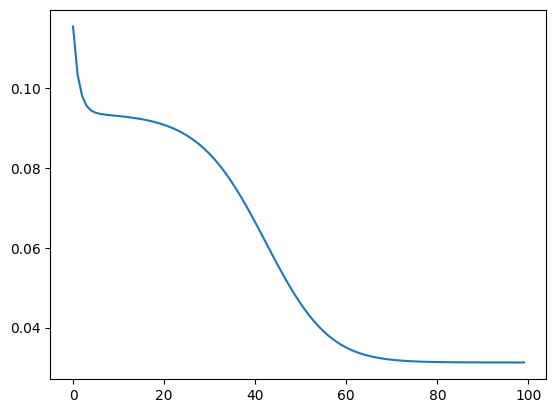

In [77]:
import matplotlib.pyplot as plt
plt.plot(epoch_errors)

In [78]:
weights_=weights[-1]
bias_=biases[-1]
weights_hidden=weights_[0]
weights_out=weights_[1]
bias_hidden=bias_[0]
bias_out=bias_[1]
o,h=forward(np.array([0,0]),weights_hidden,weights_out,bias_hidden,bias_out)

print("Prediction for {}, is {}".format([0,0],o))
o,h=forward(np.array([0,1]),weights_hidden,weights_out,bias_hidden,bias_out)
print("Prediction for {}, is {}".format([0,1],o))
o,h=forward(np.array([1,0]),weights_hidden,weights_out,bias_hidden,bias_out)
print("Prediction for {}, is {}".format([1,0],o))
o,h=forward(np.array([1,1]),weights_hidden,weights_out,bias_hidden,bias_out)
print("Prediction for {}, is {}".format([1,1],o))

Prediction for [0, 0], is -0.24695507014625118
Prediction for [0, 1], is 0.2535562463012695
Prediction for [1, 0], is 0.24779984013942336
Prediction for [1, 1], is 0.7483111565869439


**[3 points] Task-5**

The above code should have given you predictions for all possible inputs. Answer the questions based on the obtained predictions:

6. (1 point) Is there a significant difference between the predictions and the groundtruth? If yes, why is there such a difference?


7. (2 points) Can changing our network in any way improve the predictions? If yes, what changes do you propose and why?

## Part II Auto-encoders with Pytorch.

An autoencoder is a type of neural network used to learn efficient representations of data, typically for dimensionality reduction or feature learning. It consists of two main parts:

- **Encoder:** Maps the input data to a smaller, compressed representation called the "latent space" or "bottleneck".
- **Decoder:** Reconstructs the original input data from the compressed representation.

The network is trained to minimize the difference between the input and the reconstructed output, ensuring that the encoder captures the most relevant features of the data. To implement, autoencoders we will use [Pytorch](https://pytorch.org/), which is popular deep learning framework. Although this part of the project does not require a deep understanding of Pytorch, I have posted a tutorial online for those who are interested.

**Network Structure**

The network structure for the autoencoder is shown below, in general we care about compressing or reducing the dimensionality of the input which can be used to reconstruct the output. Both the encode and decode layers are modelled as separate multilayer perceptrons optimized with a single error function, the reconstruction loss.

       Input (x)
          |
    [Encoder Layers]
          |
    Compressed Representation (latent)
          |
    [Decoder Layers]
          |
    Reconstructed Input (x_)


The encoder takes the input and outputs the compressed latent vector, the decoder takes as input compressed latent vector and outputs the reconstructed  input from the latent vector. Below you will find the code to implement the autoencoder network in Pytorch. Similar to NumPy arrays, Pytorch works with objects of type *Tensor*. All the parameters, and inputs should be provided as tensors.

**Note:**
- [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) creates a hidden layer with the number of neurons specified in the hidden dimension.
-  [nn.ReLU()](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) is an activation function similar to sigmoid, etc.
- The model will be trained on a GPU. To use GPUs in Google Colab, go to "Runtime" > "Change runtime type" and select a GPU like T4, A100, etc.

In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


class Autoencoder(nn.Module):
    """
    A simple autoencoder model implemented in PyTorch.
    This model compresses input data into a smaller representation (latent space) and
    then reconstructs the input data from the compressed representation.

    Parameters:
    ----------
    input_dim : int
        The size (number of features) of the input data.
    hidden_dim : int
        The size of the hidden layers used in both encoder and decoder.
    binary_dim : int
        The size of the compressed representation (latent space).

    Layers:
    -------
    - Encoder:
        * A series of fully connected layers that reduce the input dimension to the binary_dim.
        * Includes ReLU activation functions for non-linear transformations.
    - Decoder:
        * A series of fully connected layers that reconstruct the input data from the binary_dim.
        * Includes ReLU activation functions for non-linear transformations.

    Methods:
    -------
    forward(x):
        Performs a forward pass through the network. Encodes the input data to a latent
        representation and then decodes it back to the reconstructed input.
        Returns both the reconstructed input and the latent representation.

    Example Usage:
    --------------
    >>> input_dim = 784
    >>> hidden_dim = 128
    >>> binary_dim = 64
    >>> model = Autoencoder(input_dim, hidden_dim, binary_dim)
    >>> x = torch.rand((16, input_dim))  # Batch of 16 samples
    >>> x_reconstructed, latent = model(x)
    >>> print(x_reconstructed.shape, latent.shape)  # Output: torch.Size([16, 784]), torch.Size([16, 64])
    """
    def __init__(self, input_dim, hidden_dim, binary_dim):
        super(Autoencoder, self).__init__()

        # Define the encoder network
        # It maps the input_dim to a compressed representation (latent space) of size binary_dim
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # First hidden layer
            nn.ReLU(),                         # Non-linearity
            nn.Linear(hidden_dim, hidden_dim), # Second hidden layer
            nn.ReLU(),                         # Non-linearity
            nn.Linear(hidden_dim, binary_dim), # Output layer of the encoder (compressed representation)
        )

        # Define the decoder network
        # It reconstructs the input data from the compressed representation
        self.decoder = nn.Sequential(
            nn.Linear(binary_dim, hidden_dim), # First hidden layer
            nn.ReLU(),                         # Non-linearity
            nn.Linear(hidden_dim, hidden_dim), # Second hidden layer
            nn.ReLU(),                         # Non-linearity
            nn.Linear(hidden_dim, input_dim),  # Output layer of the decoder (reconstructed input)
        )

    def forward(self, x):
        """
        Performs a forward pass through the autoencoder.

        Parameters:
        ----------
        x : torch.Tensor
            The input tensor of shape (batch_size, input_dim).

        Returns:
        -------
        x_ : torch.Tensor
            The reconstructed input tensor of the same shape as the input.
        latent : torch.Tensor
            The compressed representation (latent space) of shape (batch_size, binary_dim).
        """
        # Pass the input through the encoder to obtain the latent representation
        latent = self.encoder(x)
        # latent=float32_to_float8(latent)
        # latent=latent.half()
        # latent=latent.float()
        # Pass the latent representation through the decoder to reconstruct the input
        x_ = self.decoder(latent)

        return x_, latent

**Dataset**


We will use a hand pose dataset for training. Your goal is to reduce the dimensions of the data. The hand pose is comprised of 21 joints in an Image. The images where obtained using [Mediapipe](https://ai.google.dev/edge/mediapipe/solutions/guide). The figure below shows the 21 hand pose points obtained from Mediapipe.

![link text](https://ai.google.dev/static/mediapipe/images/solutions/hand-landmarks.png)

Let us first load our dataset and visualize some poses. The dataset we will use for this is [How2Sign Dataset](https://how2sign.github.io/), an ASL dataset for Automatic ASL recognition. To train our autoencoder I have extracted 296743 right hand poses which you will find in the **right_hand.npy** Numpy file provided along with your project.

We start by doing some data transformations and visualize the data.

***Note: Except for skipping the last two dimensions, all other data transformations are optional, if you can figure out transformations that can help you to compress the data better, please feel free to do and include your changes in the your discussion write-up***

In [80]:
import numpy as np

right_hand_data=np.load("right_hand.npy",allow_pickle=True)
print(right_hand_data.shape) # There are 21 joints each with 4 dimensions X,Y,Z and handedness (right or left)
"""
The
"""
#We will ignore the last two dimensions
right_hand_data=right_hand_data[:,:,:2]
print("Min:{} and Max:{} values before transformation".format(np.min(right_hand_data),np.max(right_hand_data)))
#We scale the data between 0 and 1
right_hand_data_transformed=(right_hand_data-np.min(right_hand_data))/(np.max(right_hand_data)-np.min(right_hand_data))
print("Min:{} and Max:{} values after transformation".format(np.min(right_hand_data_transformed),np.max(right_hand_data_transformed)))

(296743, 21, 4)
Min:-0.06574459373950958 and Max:1.1281461715698242 values before transformation
Min:0.0 and Max:1.0 values after transformation


We will use the function below to draw the hand_pose on an image and visualize it. The function takes a matplotlib axis and a hand pose to plot the hand pose on the given axis.

In [81]:
def draw_hand_from_numpy(ax, hand_pose, color='black', radius=1, thickness=2):
    """
    Draw the hand landmarks on a matplotlib axis.

    Args:
    - ax: The matplotlib axis to draw on.
    - hand_pose: A numpy array of shape (21, 3) containing the x, y, z coordinates of hand landmarks.
    - color: The color for the landmarks and connections (default is white).
    - radius: Radius of circles representing the landmarks.
    - thickness: Thickness of the lines connecting the landmarks.
    """
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),   # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),   # Index finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky
    ]

    # Plot connections
    for start_idx, end_idx in connections:
        start_point = hand_pose[start_idx, :2]  # (x, y)
        end_point = hand_pose[end_idx, :2]  # (x, y)
        ax.plot([start_point[0], end_point[0]],
                [start_point[1], end_point[1]],
                color=color, linewidth=thickness)

    # Plot landmarks
    for i in range(hand_pose.shape[0]):
        x, y = hand_pose[i, 0], hand_pose[i, 1]
        ax.scatter(x, y, color=color, s=radius * 10)




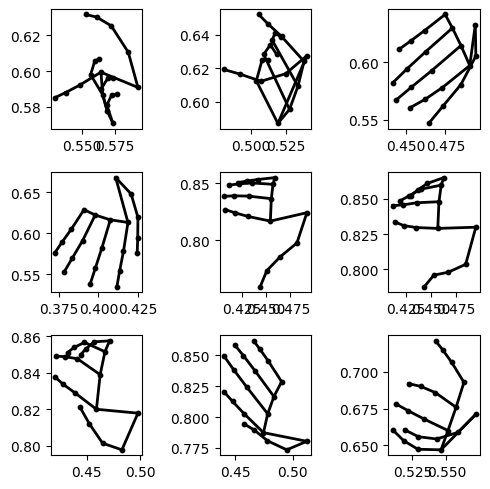

In [82]:
import matplotlib.pyplot as plt

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(5, 5))
axes = axes.flatten()
for i in range(9):
  draw_hand_from_numpy(axes[i],right_hand_data_transformed[i])
plt.tight_layout()
plt.show()

**Training:**

We are now ready to Train. **Note the training assumes that you are operating on a GPU node. If not please change the runtime before you begin.** Not doing so might lead to error.

The code below creates train/test split and also initializes the hyperparameters we will use to define the network and train. This is where you will change the hyperparameters as discussed later.

In [100]:
from sklearn.model_selection import train_test_split
right_hand_data_transformed=right_hand_data_transformed.reshape(-1,42).astype(dtype=np.float32) # Reshape each sample into a 1D vector
# # Hyperparameters
input_dim = 42      # Input dimension (number of features)
hidden_dim = 64      # Hidden layer size
latent_dim = 9     # Bottleneck latent representation size
learning_rate = 0.001
num_epochs = 100   # 50 = 1.8 err (3 min) 100 = 1.3 err (7 min)
batch_size = 150   # 250 > increase error by 2%
train,test=train_test_split(right_hand_data_transformed,test_size=0.2,random_state=42)
print(train.shape,test.shape)

(237394, 42) (59349, 42)


The next two cells of code, initialize the model and use methods to load the data. **Note we are training using Mini-batch Stochastic gradient descent with a mini-batch size of 100.** You can change this by changing the value of the batch_size parameter, again batch_size is an hyperparameter. We use MSE (Means Square Error) as the loss function and the Adam optimizer to optimize our network parameters, that wills take care of the backward propagation.

If you looked at the Autoencoder model definition you will only find the forward definition. Given that Pytorch figures out the required backpropagation computations. Which simplifies designining models and reduces probable errors in our code.

In [101]:
train=TensorDataset(torch.tensor(train,dtype=torch.float))
dataloader = DataLoader(train, batch_size, shuffle=True)
model = Autoencoder(input_dim, hidden_dim, latent_dim)
model=model.cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [102]:
for epoch in range(num_epochs):
      epoch_loss=0
      batch_count=0
      for batch_train in dataloader:
        model.train()
        optimizer.zero_grad()

        # Forward pass
        reconstructed, latent = model(batch_train[0].cuda())
        loss = criterion(reconstructed.cuda(), batch_train[0].cuda())

        # Backward pass
        loss.backward()
        optimizer.step()
        epoch_loss+=loss.item()
        batch_count+=1
      if (epoch + 1) % 5 == 0:
          print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss/batch_count:.9f}")

Epoch [5/100], Loss: 0.000161110
Epoch [10/100], Loss: 0.000065874
Epoch [15/100], Loss: 0.000055309
Epoch [20/100], Loss: 0.000048809
Epoch [25/100], Loss: 0.000036928
Epoch [30/100], Loss: 0.000029365
Epoch [35/100], Loss: 0.000026097
Epoch [40/100], Loss: 0.000021736
Epoch [45/100], Loss: 0.000016361
Epoch [50/100], Loss: 0.000014989
Epoch [55/100], Loss: 0.000014157
Epoch [60/100], Loss: 0.000013718
Epoch [65/100], Loss: 0.000013433
Epoch [70/100], Loss: 0.000013284
Epoch [75/100], Loss: 0.000013034
Epoch [80/100], Loss: 0.000012842
Epoch [85/100], Loss: 0.000012645
Epoch [90/100], Loss: 0.000012518
Epoch [95/100], Loss: 0.000012290
Epoch [100/100], Loss: 0.000011968


**Evaluation**

We will evaluate the trained model on the test dataset. We compare the trained models reconstruction loss and visualize the original and reconstructed poses.

In [103]:
latent_values=[]
input_values=[]
reconstructed_values=[]
model.eval()
with torch.no_grad():
    for i in range(test.shape[0]):
      test_sample=torch.tensor(test[i],dtype=torch.float32)
      reconstructed, binary_latent= model(test_sample.cuda())
      latent_values.append(binary_latent.cpu().tolist())
      input_values.append(test_sample.cpu().tolist())
      reconstructed_values.append(reconstructed.cpu().tolist())

In [104]:
print("The error for the test data is {}".format(criterion(torch.tensor(input_values),torch.tensor(reconstructed_values))))

The error for the test data is 1.1403823009459302e-05


Below we visually examine the original and reconstructed poses. The plots in green are the original ones and the ones in Red are reconstructed. As you can see the reconstructions are accurate for the examined samples.

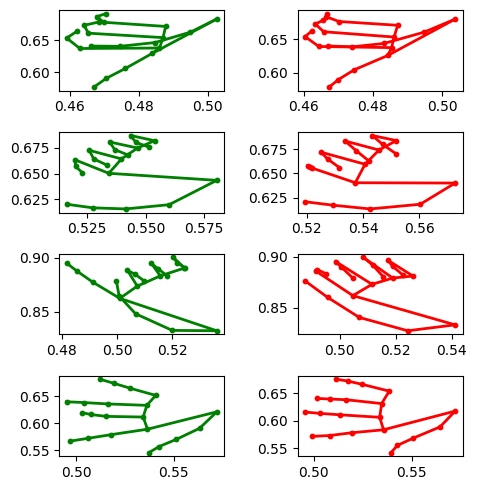

In [105]:
rows,cols=4,2
fig, axes = plt.subplots(rows, cols, figsize=(5, 5))
axes = axes.flatten()
for i in range(0,8,2):
    ground_truth=np.array(input_values[i+10]).reshape(21,-1)
    predicted=np.array(reconstructed_values[i+10]).reshape(21,-1)
    draw_hand_from_numpy(axes[i],ground_truth,color='green')
    draw_hand_from_numpy(axes[i+1],predicted,color='red')
plt.tight_layout()
plt.show()

**[9 points] Task-6** In this task, you have one goal- reduce the dimensionality of the latent layer with the minimal reconstruction loss. You will play with the following hyper-parameters to achieve this while not incurring significant drop in performance:
  - Number of hidden layers in the Encoder and Decoder
  - Number of hidden units in the hidden layer
  - Batch size
  - Learning rate
  - Number of latent units in the latent dimension
  - Number of training epochs
  - Feature transformations
  - Anything else?

**Note1: You will have to retrain the model everytime you change an hyper-parameter and evaluate.**

**Note2: Increasing the number of layers for Encoder or Decoder requires changing the Autoencoder model definition**


The final set of hyper-parameters, you leave with will be assumed to be the one that you have finalized.

***In addition, to leaving the hyper-parameters intact in your final submission you should also write a brief discussion regarding the chosen hyperparameters. Your discussion, should answer the following questions:***

- What was the maximum reduction in dimenstionality you could achieve?
- What are the major hyperparameters that impacted your performance? For this you should talk about things like, what is impact of breadth vs depth, does changing the learning rate help? Does changing the training time - number of epochs help?
- How much is the difference between the original reconstruction loss and your current configuration?
- What happens when you tried to reduce the dimensionality of the latent layer further? Is there a bound to the size?



 Below, the trained version of your model will be saved which will be evaluated on performance. You should include the model as part of the submission.

**[5 Points] Extra credit** Even reducing the number of dimensions might not significantly reduce the size of the data as we use 32 bit floating point numbers to represent the data during training. For the extra credit, you need to reduce the number of bits required to represent the latent representations. The best possible scenario is to have the latent dimensions be binary in that case each latent value is just a bit. Here are some suggestions to try:

- Constraint the parameters to be float16 or float8 values during training
- Constraint the latent layer to output only binary values (0 or 1)
- Change the latent representation to float16 or float8 after training, *this might not completely work as your model was trained with different range of values.*

In [106]:
torch.save(model, "autoencoder_model.pth")

**Submission Instructions**


- Your submission should include three files, please use your lastname in the place holder.

  - If your last name is Doe then the file for answers will be answers_Doe.txt:
Written answers, the file should be named answers_(lastname).txt
  - The ipynb file, the file should be name P3_(lastname).ipynb
  - The Autoencoder model file autoencoder_model_(lastname).pkl
  
- Please add comments to the code in appropriate places

###Start Early, Good Luck!